In [11]:
import pickle as pkl
pklfile = 'C:/Users/Kartik/Documents/github_projs/housekeep_main_branch/user-preferences-housekeep/results_19-04-2023_00-45-08.pkl'

with open(pklfile, 'rb') as f:
    results_data = pkl.load(f)

for k, v in results_data['config:'].items(): print(k, v)

hidden_size 512
output_size 1
batch_size 64
max_epochs 15
lr 0.0001
num_layers 2
weight_decay 1e-06
data_path preferences-by-disagreement/personas_tensor_data_18-04-2023_23-59-11.pt
user_conditioned False


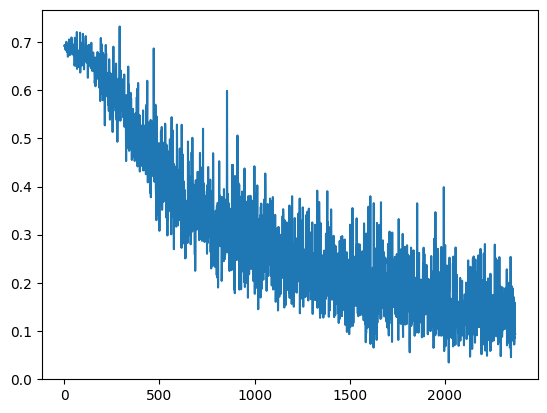

In [12]:
import matplotlib.pyplot as plt

plt.plot(results_data['train_loss_history'])

# [[ 1048  1036]
#  [10444 10456]]


In [13]:
import matplotlib.pyplot as plt
import numpy as np
print('User conditioning: ', results_data['config:']['user_conditioned'])

results_by_type = dict({
                        'seen': np.zeros((2,2)), 
                        'unseen': np.zeros((2,2))
                        })

for y_gt, y_pred, seen_label in zip(results_data['network_output']['y'], 
                                    results_data['network_output']['y_pred'], 
                                        results_data['network_output']['seen_labels']):

    assert seen_label in [True, False]
    outer_key = 'seen' if seen_label else 'unseen'

    # add to confusion matrix
    if y_gt == 1 and y_pred == 1:
        results_by_type[outer_key][0,0] += 1
    elif y_gt == 0 and y_pred == 0:
        results_by_type[outer_key][1,1] += 1
    elif y_gt == 0 and y_pred == 1:
        results_by_type[outer_key][1,0] += 1
    elif y_gt == 1 and y_pred == 0:
        results_by_type[outer_key][0,1] += 1

def f1_score(confusion_matrix, average='macro'):
    precision = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[1,0])
    recall = confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1])
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

f1_seen = f1_score(results_by_type['seen'])
f1_unseen = f1_score(results_by_type['unseen'])

print('F1 score for seen: ', f1_seen,)
print('F1 score for unseen: ', f1_unseen)

User conditioning:  False
F1 score for seen:  0.2949352931778239
F1 score for unseen:  0.3487324986122247
